# Batting Data Set EDA

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import data set

In [12]:
df=pd.read_csv("cleanBatting.csv")

##### First 5 Rows

In [13]:
df.head()

,match_id,match_name,home_team,away_team,venue,city,current_innings,innings_id,name,fullName,runs,ballsFaced,minutes,fours,sixes,strikeRate,captain,isNotOut
0,1298179,ENG v PAK,PAK,ENG,Melbourne Cricket Ground,Melbourne,PAK,1,Iftikhar Ahmed,Iftikhar Ahmed,0,6,8,0,0,0.0,0,0
1,1298176,INDIA v ZIM,INDIA,ZIM,Melbourne Cricket Ground,Melbourne,ZIM,2,W Madhevere,Wessly Madhevere,0,1,1,0,0,0.0,0,0
2,1298176,INDIA v ZIM,INDIA,ZIM,Melbourne Cricket Ground,Melbourne,ZIM,2,RW Chakabva,Regis Chakabva,0,6,9,0,0,0.0,0,0
3,1298176,INDIA v ZIM,INDIA,ZIM,Melbourne Cricket Ground,Melbourne,ZIM,2,B Muzarabani,Blessing Muzarabani,0,2,5,0,0,0.0,0,1
4,1298175,BAN v PAK,BAN,PAK,Adelaide Oval,Adelaide,BAN,1,Nurul Hasan,Nurul Hasan,0,3,4,0,0,0.0,0,0


##### Get No OF Rows and Columns

In [14]:
df.shape

(699, 18)

##### Get the summerized information of the data set

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   match_id         699 non-null    int64  
 1   match_name       699 non-null    object 
 2   home_team        699 non-null    object 
 3   away_team        699 non-null    object 
 4   venue            699 non-null    object 
 5   city             699 non-null    object 
 6   current_innings  699 non-null    object 
 7   innings_id       699 non-null    int64  
 8   name             699 non-null    object 
 9   fullName         699 non-null    object 
 10  runs             699 non-null    int64  
 11  ballsFaced       699 non-null    int64  
 12  minutes          699 non-null    int64  
 13  fours            699 non-null    int64  
 14  sixes            699 non-null    int64  
 15  strikeRate       699 non-null    float64
 16  captain          699 non-null    int64  
 17  isNotOut        

##### Get Numerical Data descriptive statistics data

In [16]:
df1=df.describe()

In [17]:
df1.drop(columns=["match_id","innings_id","captain","isNotOut"])

,runs,ballsFaced,minutes,fours,sixes,strikeRate
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,15.978541,13.648069,22.808298,1.300429,0.473534,95.882232
std,18.709462,12.716854,21.054790,1.834448,0.978465,61.428293
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,8.000000,0.000000,0.000000,50.000000
50%,9.000000,10.000000,16.000000,1.000000,0.000000,100.000000
75%,22.500000,19.000000,31.000000,2.000000,1.000000,133.330000
max,109.000000,64.000000,106.000000,10.000000,8.000000,400.000000


##### Get Categorical Data Statistical details

In [18]:
df.describe(include=object)

,match_name,home_team,away_team,venue,city,current_innings,name,fullName
count,699,699,699,699,699,699,699,699
unique,42,16,15,7,7,16,198,198
top,PAK v SA,INDIA,NED,"Bellerive Oval, Hobart",Hobart,ZIM,BFW de Leede,Bas de Leede
freq,21,76,107,136,136,74,8,8


In [19]:
numerical_variables = df.select_dtypes(include='number')
numerical_variables=numerical_variables.drop(columns=["match_id","innings_id","captain","isNotOut"])
numerical_variables.head()

,runs,ballsFaced,minutes,fours,sixes,strikeRate
0,0,6,8,0,0,0.0
1,0,1,1,0,0,0.0
2,0,6,9,0,0,0.0
3,0,2,5,0,0,0.0
4,0,3,4,0,0,0.0


Text(0.5, 1.0, 'Correlation Analysis of the batting dataset')

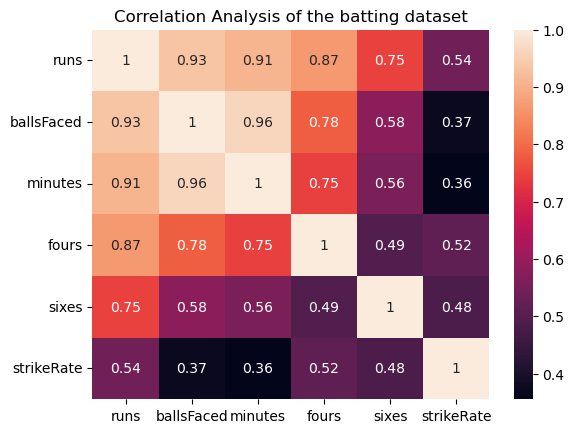

In [20]:
df3= numerical_variables.corr()
sns.heatmap(df3,annot=True)
plt.title("Correlation Analysis of the batting dataset")

In [21]:
categorical_variables = df.select_dtypes(include='object')
categorical_variables.head()

,match_name,home_team,away_team,venue,city,current_innings,name,fullName
0,ENG v PAK,PAK,ENG,Melbourne Cricket Ground,Melbourne,PAK,Iftikhar Ahmed,Iftikhar Ahmed
1,INDIA v ZIM,INDIA,ZIM,Melbourne Cricket Ground,Melbourne,ZIM,W Madhevere,Wessly Madhevere
2,INDIA v ZIM,INDIA,ZIM,Melbourne Cricket Ground,Melbourne,ZIM,RW Chakabva,Regis Chakabva
3,INDIA v ZIM,INDIA,ZIM,Melbourne Cricket Ground,Melbourne,ZIM,B Muzarabani,Blessing Muzarabani
4,BAN v PAK,BAN,PAK,Adelaide Oval,Adelaide,BAN,Nurul Hasan,Nurul Hasan


##### Get the Number of Unique Valuecounts of the E every column(Attribute)

In [22]:
df.nunique()

match_id            42
match_name          42
home_team           16
away_team           15
venue                7
city                 7
current_innings     16
innings_id           2
name               198
fullName           198
runs                78
ballsFaced          58
minutes             89
fours               11
sixes                9
strikeRate         239
captain              2
isNotOut             2
dtype: int64

# Analysing Numeical Data

##### Analysing disribution of the runs (Univariate Analysis)


Text(0.5, 1.0, 'Players Runs Distribution')

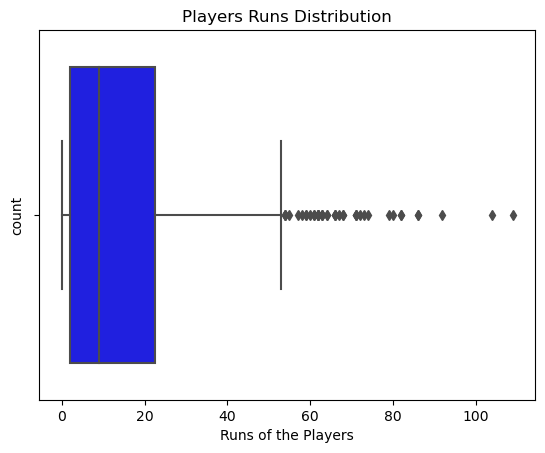

In [23]:
sns.boxplot(x="runs",data=df,color="blue")
plt.xlabel("Runs of the Players")
plt.ylabel("count")
plt.title("Players Runs Distribution")



#### Ientifying Upper  and Low Wisker numerically


In [24]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['runs'].quantile(0.25)
Q3 = df['runs'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Wisker is :",lower_bound,"And Upper Wisker is :" ,upper_bound)


Lower Wisker is : -28.75 And Upper Wisker is : 53.25


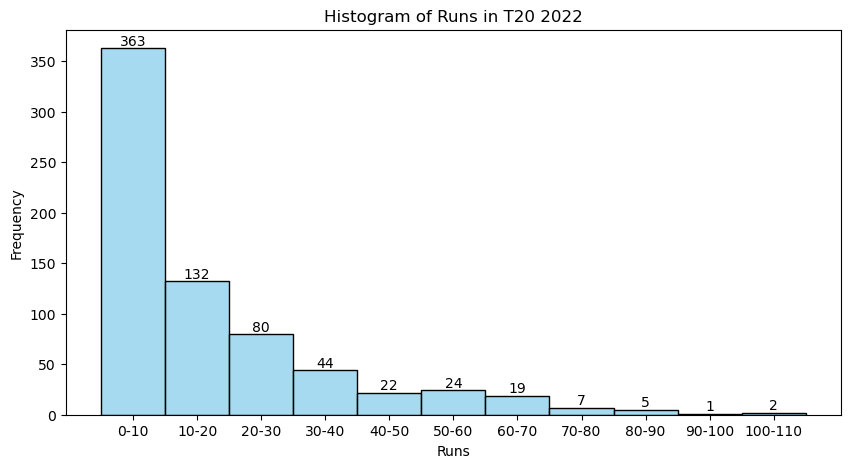

In [25]:

bins = np.arange(0, 120, 10)  # goes from 0 to 100, with steps of 10

# Create the histogram
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x="runs", bins=bins, color="skyblue")

# Set the plot title and labels
plt.title("Histogram of Runs in T20 2022")
plt.xlabel("Runs")
plt.ylabel("Frequency")

# Custom x-axis labels
ax.set_xticks(bins[:-1] + 5)  # This centers the label between the bins
ax.set_xticklabels([f"{int(b)}-{int(b+10)}" for b in bins[:-1]])

# Annotate the heights of the bars
for p in ax.patches:
    if p.get_height() > 0:  # Only annotate non-zero bars
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')

plt.show()



According to the above graph it is right skewness distribution and to cobert that into normal
Distribution can be used Log Transformation for Runs

<AxesSubplot:xlabel='log_runs', ylabel='Count'>

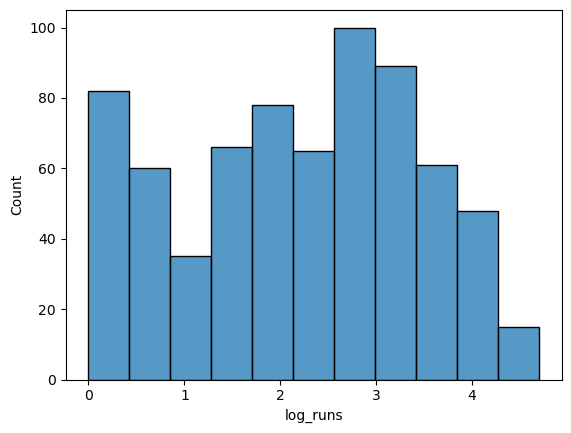

In [26]:
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame and 'runs' is the column containing the data you want to analyze
# Convert the 'runs' column to log scale
df['log_runs'] = np.log(df['runs'] + 1)  # Adding 1 to avoid logarithm of zero for any zero value

# Plot the histogram of the log-transformed data
sns.histplot(x='log_runs', data=df)


<AxesSubplot:xlabel='log_runs'>

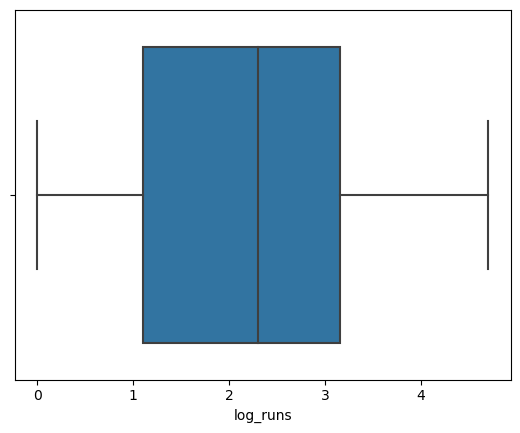

In [27]:
sns.boxplot(x="log_runs",data=df)

In [28]:
df[["runs","log_runs"]]

,runs,log_runs
0,0,0.000000
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000
...,...,...
694,82,4.418841
695,22,3.135494
696,41,3.737670
697,20,3.044522


##### Analysing disribution of the Four runs (Univariate Analysis)

Text(0.5, 1.0, 'Players Four Runs Distribution')

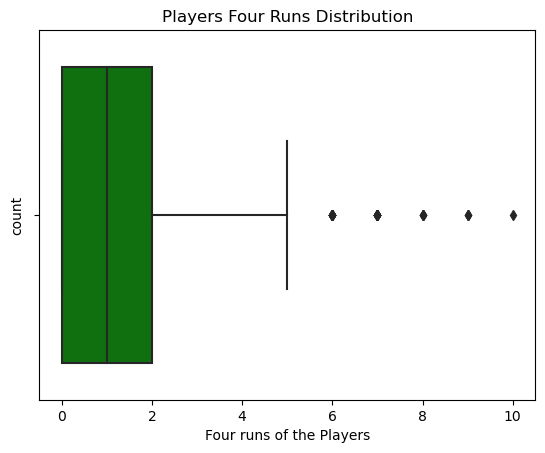

In [29]:
sns.boxplot(x="fours",data=df,color="Green")
plt.xlabel("Four runs of the Players")
plt.ylabel("count")
plt.title("Players Four Runs Distribution")


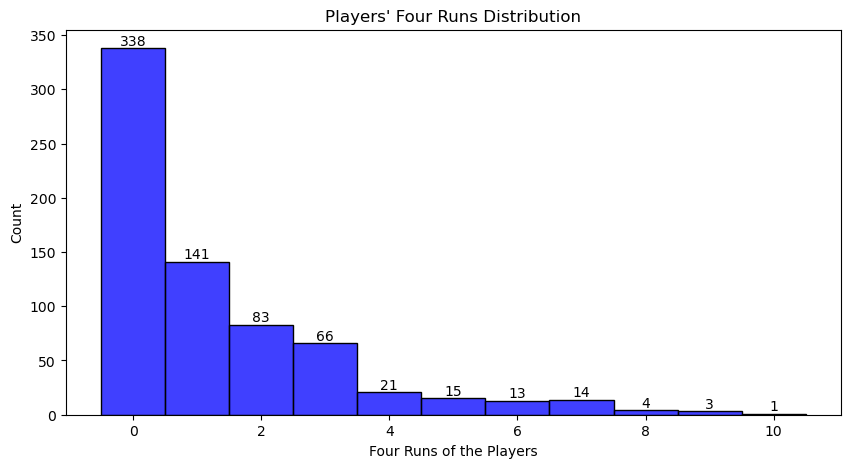

In [30]:
plt.figure(figsize=(10, 5))  # Setting the figure size
ax = sns.histplot(data=df, x='fours', discrete=True, color='blue', binwidth=1)

# Setting the labels and title
plt.xlabel("Four Runs of the Players")
plt.ylabel("Count")
plt.title("Players' Four Runs Distribution")

# Annotate each bar with its frequency
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # Formatting the number to 0 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the text to be centered on the bar
                ha='center', va='center',  # Center alignment horizontally and vertically
                xytext=(0, 5),  # Offset text by 5 points vertically
                textcoords='offset points')  # Use offset points for text coordinates

plt.show()


According to the above graph No of Four Runs of the players has right skeewness

##### Analysing disribution of the Six runs (Univariate Analysis)

Text(0.5, 1.0, 'Players Six Runs Distribution')

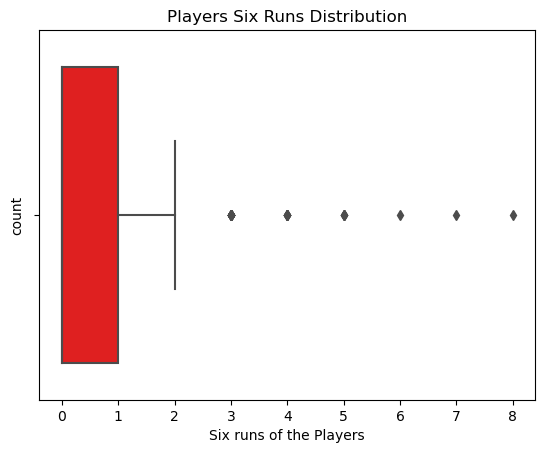

In [31]:
sns.boxplot(x="sixes",data=df,color="red")
plt.xlabel("Six runs of the Players")
plt.ylabel("count")
plt.title("Players Six Runs Distribution")

According to the above graph No of Six Runs of the players has right skeewness

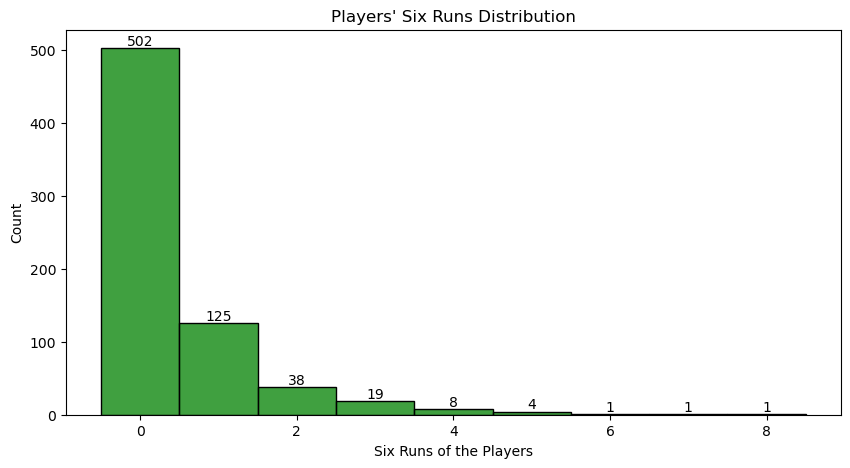

In [32]:
plt.figure(figsize=(10, 5))  # Setting the figure size
ax = sns.histplot(data=df, x='sixes', discrete=True, color='green', binwidth=1)

# Setting the labels and title
plt.xlabel("Six Runs of the Players")
plt.ylabel("Count")
plt.title("Players' Six Runs Distribution")

# Annotate each bar with its frequency
for p in ax.patches:
    # Using the bar height to display count on the bar
    ax.annotate(f'{int(p.get_height())}',  # Format the height as integer and convert to string
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Center the text above each bar
                ha='center', va='center',  # Horizontal and vertical alignment
                xytext=(0, 5),  # Positioning text 5 points above the bar
                textcoords='offset points')  # Offset points relate to the coordinates being modified by xytext

plt.show()

According to the above graph No of Six Runs of the players has right skeewness

##### Analysing disribution of the Strike Rate (Univariate Analysis)

Text(0.5, 1.0, 'Players  Four Runs Distribution')

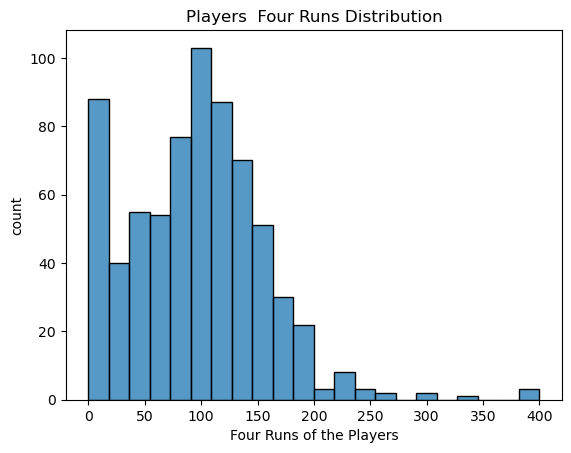

In [33]:
sns.histplot(x='strikeRate',data=df)
plt.xlabel("Four Runs of the Players")
plt.ylabel("count")
plt.title("Players  Four Runs Distribution")

According to the above graph Strike Rate of the players has right skeewness

##### Analysing disribution of the Strike Rate (Univariate Analysis)

Text(0.5, 1.0, 'Players balls Faced Distribution')

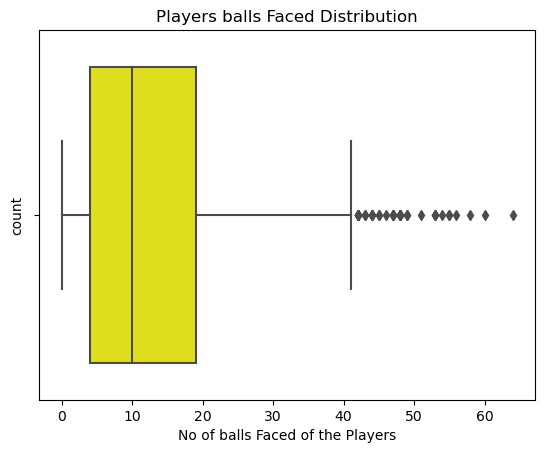

In [34]:
sns.boxplot(x="ballsFaced",data=df,color="yellow")
plt.xlabel("No of balls Faced of the Players")
plt.ylabel("count")
plt.title("Players balls Faced Distribution")

Text(0.5, 1.0, 'Players balls Faced Distribution')

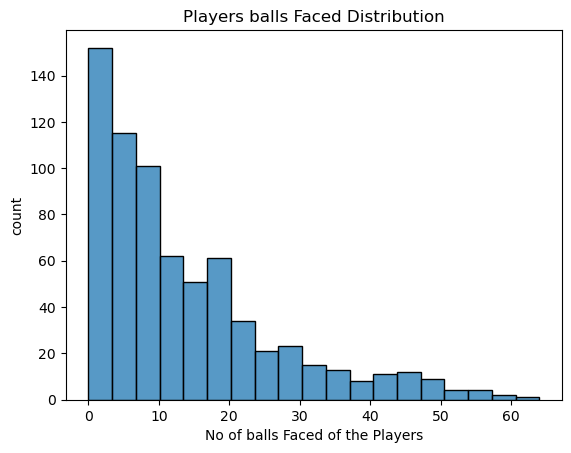

In [35]:
sns.histplot(x='ballsFaced',data=df)
plt.xlabel("No of balls Faced of the Players")
plt.ylabel("count")
plt.title("Players balls Faced Distribution")

According to the above graph No of Ball Faced of the players has right skeewness

##### Analysing disribution of the Minutes Spend by the Players (Univariate Analysis)

Text(0.5, 1.0, 'Players minutes Spend Distribution')

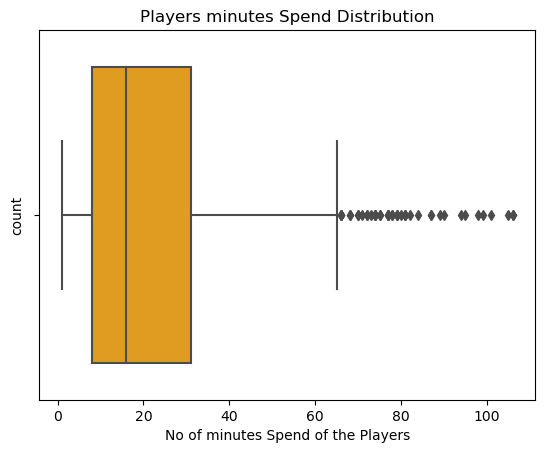

In [36]:
sns.boxplot(x="minutes",data=df,color="orange")
plt.xlabel("No of minutes Spend of the Players")
plt.ylabel("count")
plt.title("Players minutes Spend Distribution")

Text(0.5, 1.0, 'Players minutes Spend Distribution')

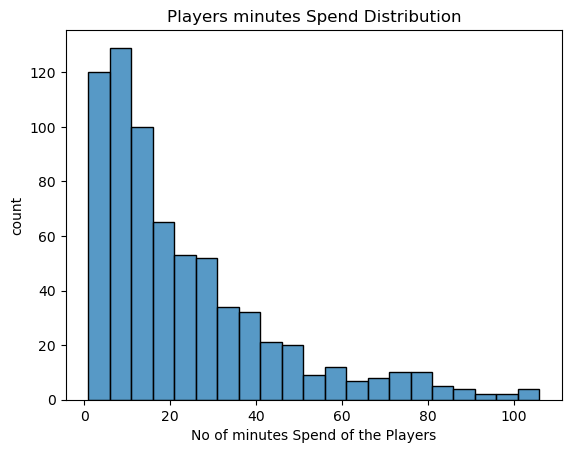

In [37]:
sns.histplot(x='minutes',data=df)
plt.xlabel("No of minutes Spend of the Players")
plt.ylabel("count")
plt.title("Players minutes Spend Distribution")

According to the above graph No of Minutes Spend of the players has right skeewness

# Analysing Categorical Data

In [38]:
df_sorted = df.sort_values(by='runs', ascending=False)

#### Representing Country taken runs of the Tournement (Bivariate Analysis)

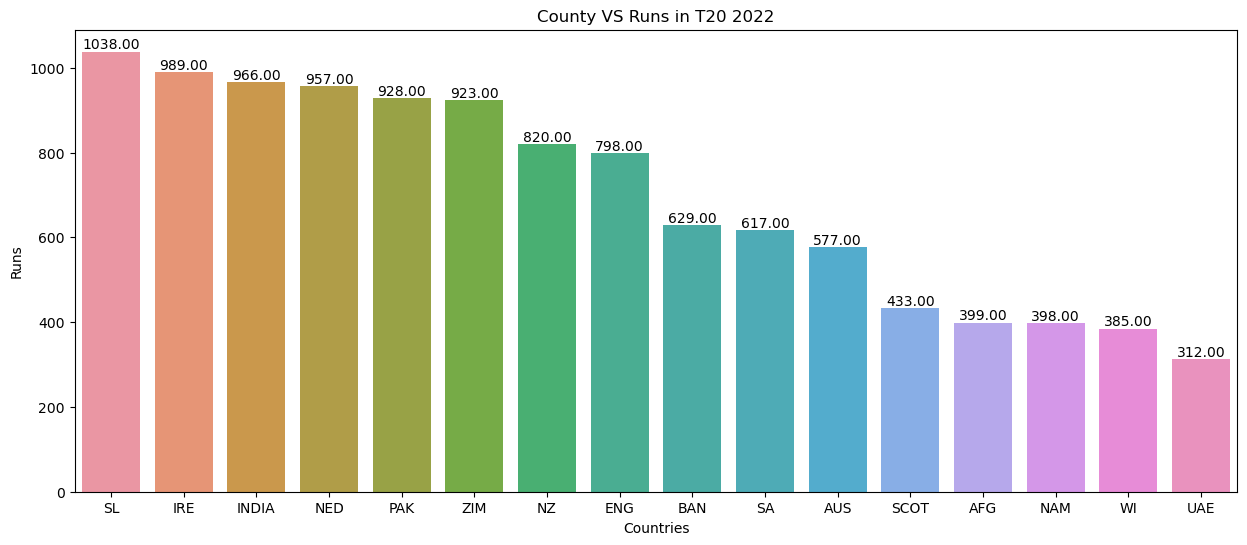

In [39]:

# Group DataFrame by 'current_innings' and calculate the sum of runs
df_sum = df.groupby('current_innings')['runs'].sum().reset_index()

# Sort DataFrame by the sum of runs in descending order
df_sum_sorted = df_sum.sort_values(by='runs', ascending=False)
plt.figure(figsize=(15, 6))
# Create bar plot with seaborn
ax = sns.barplot(x='current_innings', y='runs', data=df_sum_sorted)
plt.title("County VS Runs in T20 2022")
plt.xlabel("Countries")
plt.ylabel("Runs")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()




#### Representing Country taken four runs of the Tournement (Bivariate Analysis)

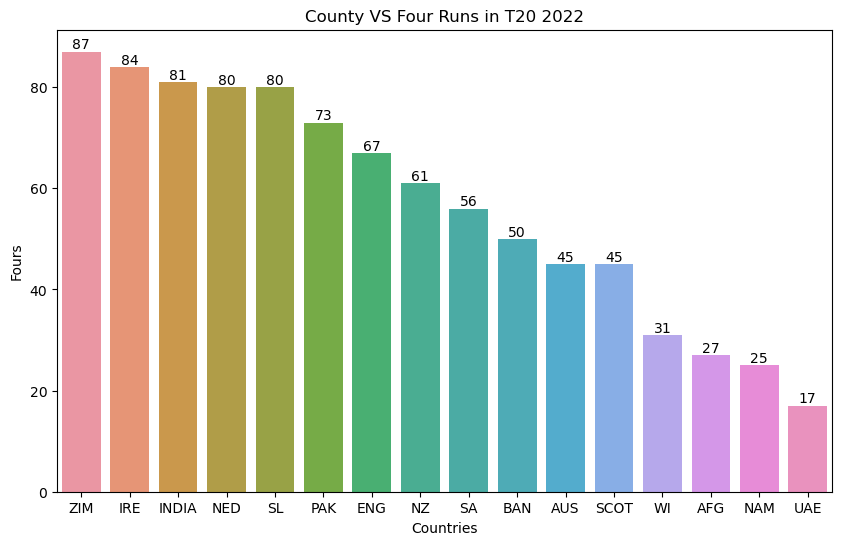

In [40]:
# Group DataFrame by 'current_innings' and calculate the count of fours
df_count = df.groupby('current_innings')['fours'].sum().reset_index()

# Sort DataFrame by the count of foursin descending order
df_count_sorted = df_count.sort_values(by='fours', ascending=False)
plt.figure(figsize=(10, 6))

# Create bar plot with seaborn
ax = sns.barplot(x='current_innings', y='fours', data=df_count_sorted)
plt.title("County VS Four Runs in T20 2022")
plt.xlabel("Countries")
plt.ylabel("Fours")

# Add values on top of each bar as integers
for p in ax.patches:
    ax.annotate('{:d}'.format(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

#### Representing Country taken Six runs of the Tournement (Bivariate Analysis)

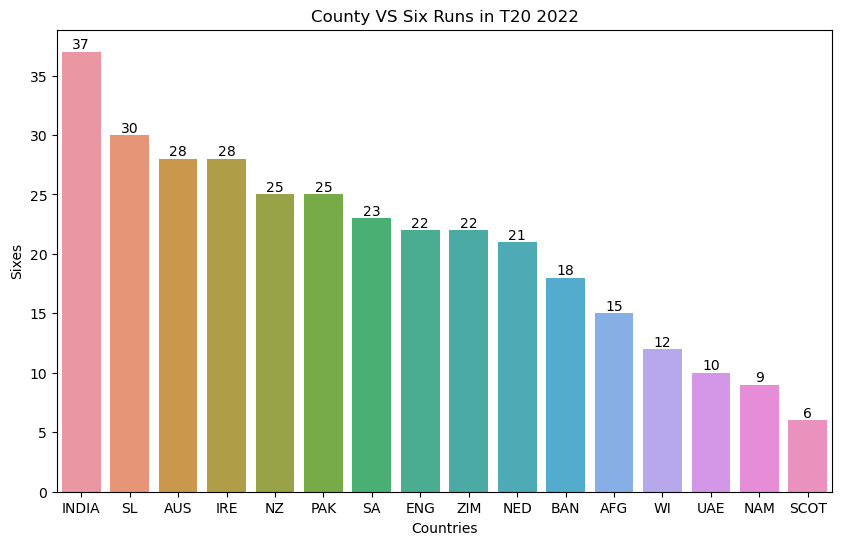

In [41]:
# Group DataFrame by 'current_innings' and calculate the count of sixes
df_count1 = df.groupby('current_innings')['sixes'].sum().reset_index()

# Sort DataFrame by the count of sixes in descending order
df_count1_sorted = df_count1.sort_values(by='sixes', ascending=False)
plt.figure(figsize=(10, 6))

# Create bar plot with seaborn
ax = sns.barplot(x='current_innings', y='sixes', data=df_count1_sorted)
plt.title("County VS Six Runs in T20 2022")
plt.xlabel("Countries")
plt.ylabel("Sixes")

# Add values on top of each bar as integers
for p in ax.patches:
    ax.annotate('{:d}'.format(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

#### Distribution of the Players Runs (Univariate Analysis)

In [42]:
df_count1 = df.groupby('venue')['runs'].sum().reset_index()
df_count1_sorted = df_count1.sort_values(by='runs', ascending=False)

#### Get the Average Run of a player according to the Ground

In [43]:
# Assuming df is your DataFrame with 'venue' and 'runs' columns
average_runs_per_venue = df.groupby('venue')['runs'].mean().reset_index()
average_runs_per_venue

,venue,runs
0,Adelaide Oval,17.850877
1,"Bellerive Oval, Hobart",16.823529
2,Brisbane Cricket Ground,17.462687
3,Melbourne Cricket Ground,15.070423
4,Perth Stadium,13.552941
5,Simonds Stadium,13.648148
6,Sydney Cricket Ground,16.779661


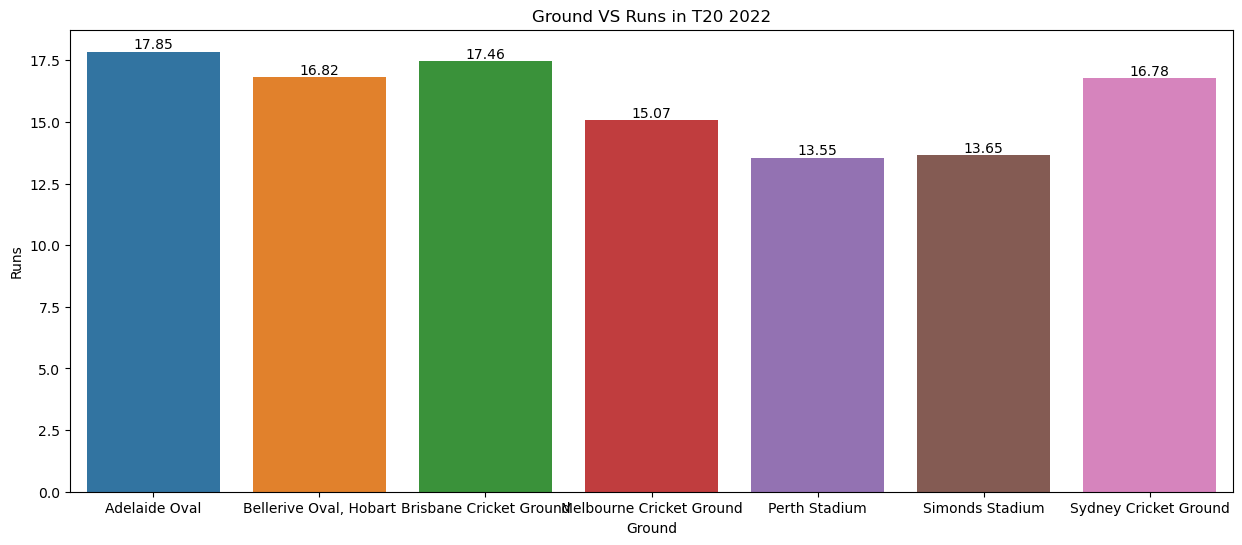

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_count1 is already defined as described
plt.figure(figsize=(15, 6))

# Create bar plot with seaborn
ax = sns.barplot(x='venue', y='runs', data=average_runs_per_venue)
plt.title("Ground VS Runs in T20 2022")
plt.xlabel("Ground")
plt.ylabel("Runs")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')

plt.show()


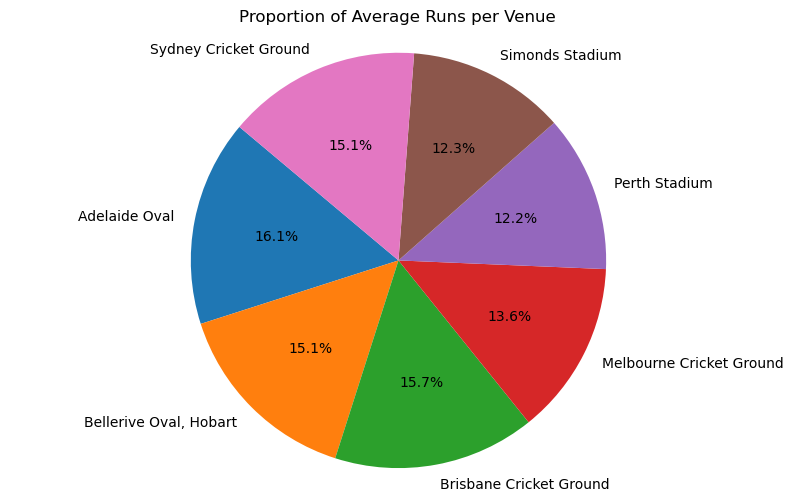

In [45]:
import matplotlib.pyplot as plt



# Calculate proportions of runs for each venue
proportions = average_runs_per_venue['runs'] 

# Assuming average_runs_per_venue is already defined as described
plt.figure(figsize=(10, 6))

# Create pie chart
plt.pie(proportions, labels=average_runs_per_venue['venue'], autopct='%1.1f%%', startangle=140)

plt.title("Proportion of Average Runs per Venue")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


#### Get Each country no of Four Runs according to the Ground

In [46]:
df_count1 = df.groupby(['current_innings','venue'])['fours'].count().reset_index()
df_count1

,current_innings,venue,fours
0,AFG,Adelaide Oval,9
1,AFG,Brisbane Cricket Ground,9
2,AFG,Perth Stadium,11
3,AUS,Adelaide Oval,10
4,AUS,Brisbane Cricket Ground,7
5,AUS,Perth Stadium,5
6,AUS,Sydney Cricket Ground,11
7,BAN,Adelaide Oval,18
8,BAN,"Bellerive Oval, Hobart",10
9,BAN,Brisbane Cricket Ground,8


In [47]:
import pandas as pd

# Assuming df is your initial DataFrame and you've already performed the grouping as mentioned
df_count1 = df.groupby(['current_innings', 'venue'])['fours'].count().reset_index()

# Now sort the DataFrame first by 'venue' and then by 'fours' in descending order
df_count1 = df_count1.sort_values(by=['venue', 'fours'], ascending=[True, False])

# Showing the sorted DataFrame
print(df_count1)


   current_innings                     venue  fours
7              BAN             Adelaide Oval     18
16           INDIA             Adelaide Oval     15
25             NED             Adelaide Oval     13
20             IRE             Adelaide Oval     11
49             ZIM             Adelaide Oval     11
3              AUS             Adelaide Oval     10
37              SA             Adelaide Oval     10
0              AFG             Adelaide Oval      9
30              NZ             Adelaide Oval      8
33             PAK             Adelaide Oval      7
11             ENG             Adelaide Oval      2
50             ZIM    Bellerive Oval, Hobart     32
21             IRE    Bellerive Oval, Hobart     30
48              WI    Bellerive Oval, Hobart     27
41            SCOT    Bellerive Oval, Hobart     21
26             NED    Bellerive Oval, Hobart     11
8              BAN    Bellerive Oval, Hobart     10
42              SL    Bellerive Oval, Hobart      3
38          

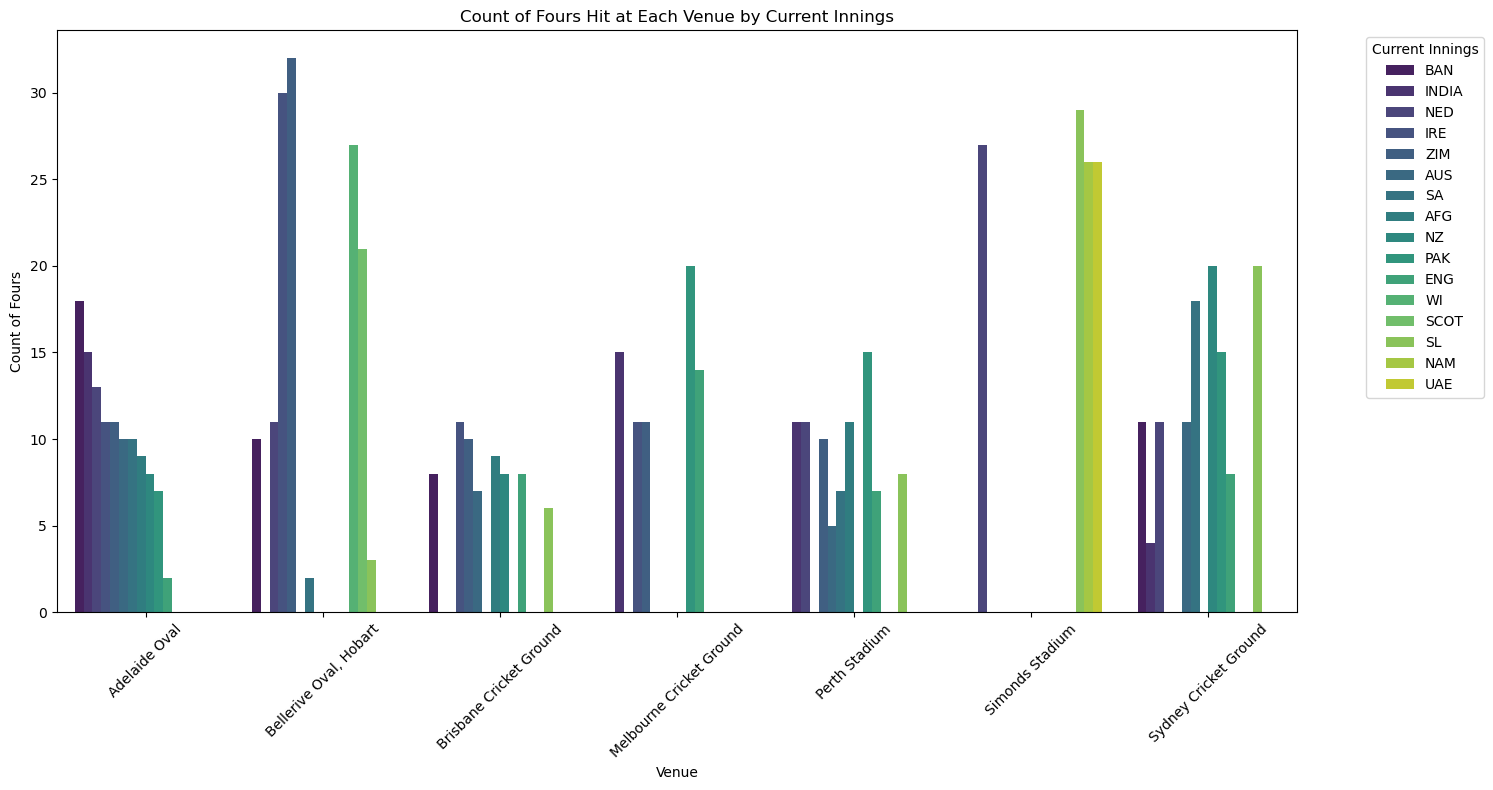

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_count1 is already defined and sorted as per your previous instructions

# Create the bar plot
plt.figure(figsize=(15, 8))  # Set the figure size for better visibility
ax = sns.barplot(x='venue', y='fours', hue='current_innings', data=df_count1, palette='viridis')

# Customize the plot with labels and title
plt.xlabel('Venue')
plt.ylabel('Count of Fours')
plt.title('Count of Fours Hit at Each Venue by Current Innings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Place the legend outside the plot area
plt.legend(title='Current Innings', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust subplot parameters to give some padding
plt.show()


#### Get Each country no of Six Runs according to the Ground

In [52]:
df_count1 = df.groupby(['current_innings','venue'])['sixes','fours'].count().reset_index()
df_count1

C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\2283174993.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_count1 = df.groupby(['current_innings','venue'])['sixes','fours'].count().reset_index()


,current_innings,venue,sixes,fours
0,AFG,Adelaide Oval,9,9
1,AFG,Brisbane Cricket Ground,9,9
2,AFG,Perth Stadium,11,11
3,AUS,Adelaide Oval,10,10
4,AUS,Brisbane Cricket Ground,7,7
5,AUS,Perth Stadium,5,5
6,AUS,Sydney Cricket Ground,11,11
7,BAN,Adelaide Oval,18,18
8,BAN,"Bellerive Oval, Hobart",10,10
9,BAN,Brisbane Cricket Ground,8,8


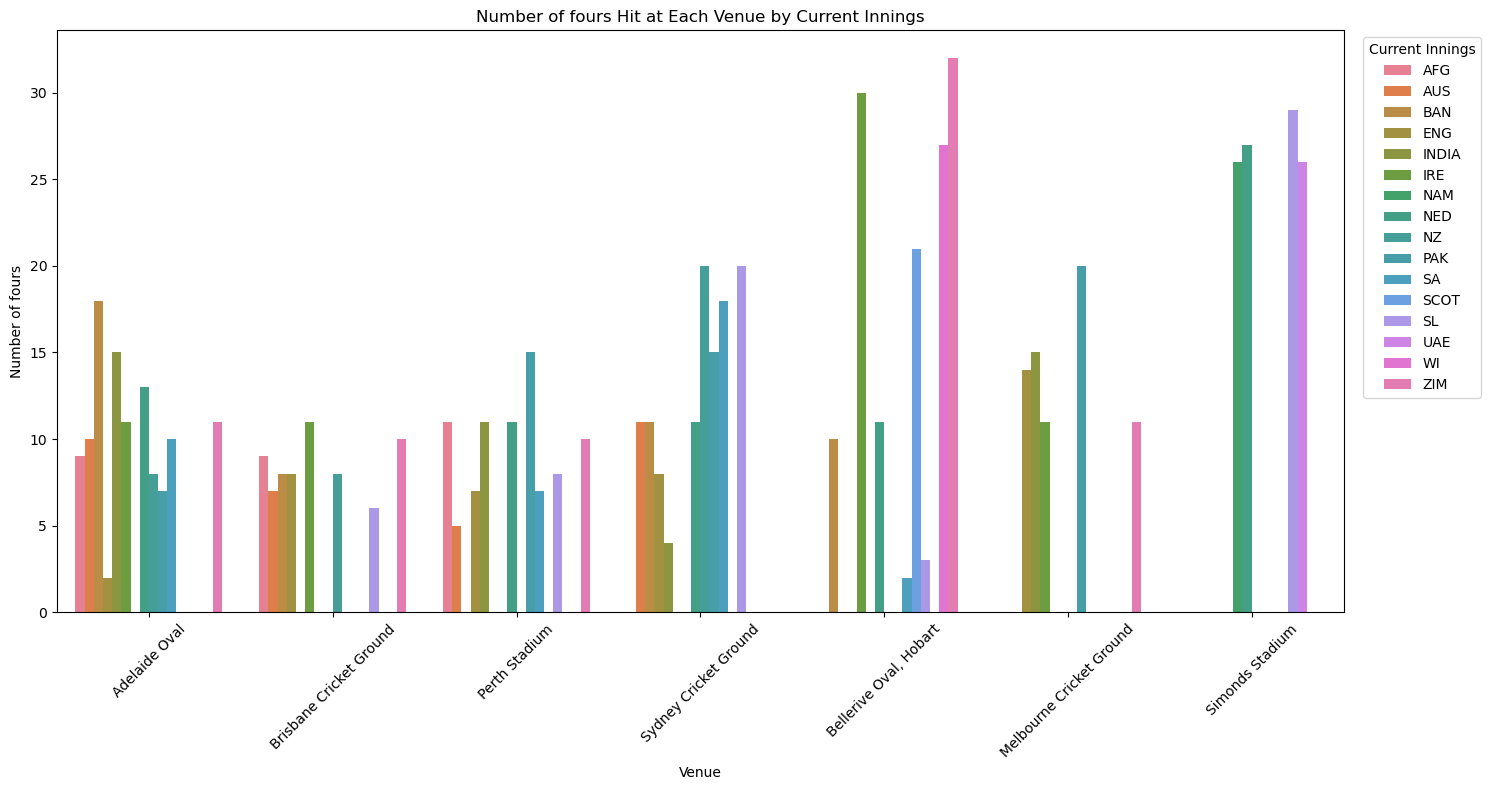

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df_count1 is defined with 'venue', 'fours', 'current_innings', and a suitable color palette
plt.figure(figsize=(15, 8))

# Generating a palette with enough colors
palette = sns.color_palette("husl", df_count1['current_innings'].nunique())

# Creating the bar plot
ax = sns.barplot(x='venue', y='fours', hue='current_innings', data=df_count1, palette=palette)

plt.xlabel('Venue')
plt.ylabel('Number of fours')
plt.title('Number of fours Hit at Each Venue by Current Innings')
plt.xticks(rotation=45)

# Placing the legend outside the plot
plt.legend(title='Current Innings', bbox_to_anchor=(1.01, 1), loc='upper left')




plt.tight_layout()
plt.show()


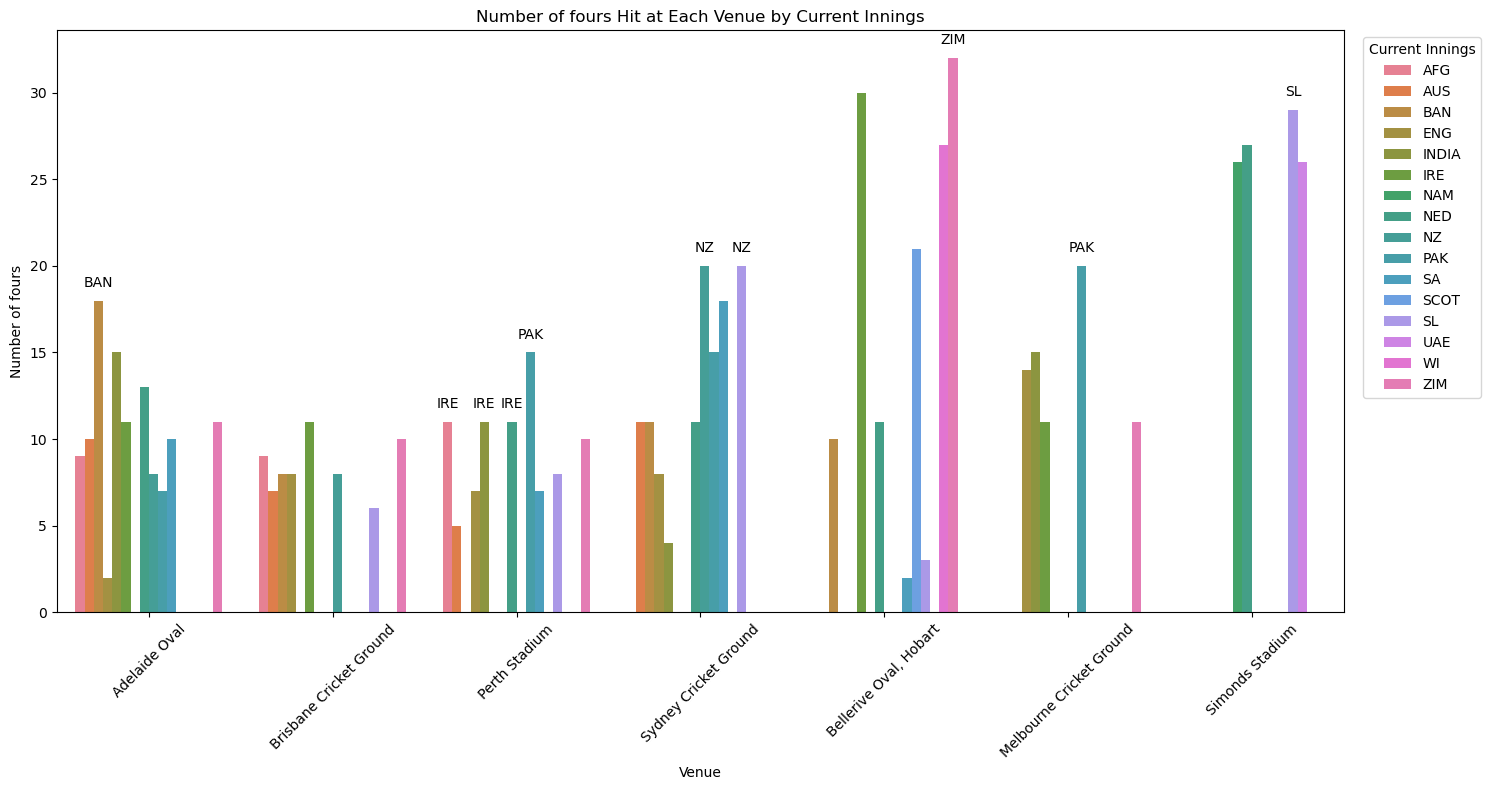

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame assuming it's defined
# Example structure of df_count1:
# df_count1 = pd.DataFrame({
#     'venue': ['Venue1', 'Venue1', 'Venue2', 'Venue2'],
#     'fours': [10, 20, 15, 5],
#     'current_innings': ['Inning1', 'Inning2', 'Inning1', 'Inning2']
# })

plt.figure(figsize=(15, 8))

# Generating a palette with enough colors
palette = sns.color_palette("husl", df_count1['current_innings'].nunique())

# Creating the bar plot
ax = sns.barplot(x='venue', y='fours', hue='current_innings', data=df_count1, palette=palette)

plt.xlabel('Venue')
plt.ylabel('Number of fours')
plt.title('Number of fours Hit at Each Venue by Current Innings')
plt.xticks(rotation=45)
plt.legend(title='Current Innings', bbox_to_anchor=(1.01, 1), loc='upper left')

# Get the maximum 'fours' and its corresponding 'current_innings' for each 'venue'
max_fours_per_venue = df_count1.groupby('venue').apply(
    lambda x: x.loc[x['fours'].idxmax()]
)

# Annotating the plot with the highest inning per venue
for p in ax.patches:
    # Find venue name from the bar position (extract from x-labels)
    venue_name = ax.get_xticklabels()[int(p.get_x() + p.get_width() / 2)].get_text()
    # Get the inning name that has the maximum 'fours' for this venue
    inning_label = max_fours_per_venue.loc[venue_name, 'current_innings']
    # Only annotate the highest one
    if max_fours_per_venue.loc[venue_name, 'fours'] == p.get_height():
        ax.annotate(inning_label,
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    textcoords="offset points",
                    xytext=(0, 10),
                    ha='center')

plt.tight_layout()
plt.show()


#### Get No of the Ground Played by Each Country

In [ ]:
df_count1 = df.groupby('current_innings')['venue'].agg(['nunique', lambda x: list(x.unique())]).reset_index()
df_count1.columns = ['current_innings', 'venue_count', 'venue_names']
df_count1

,current_innings,venue_count,venue_names
0,AFG,3,"[Adelaide Oval, Perth Stadium, Brisbane Cricke..."
1,AUS,4,"[Adelaide Oval, Sydney Cricket Ground, Brisban..."
2,BAN,4,"[Adelaide Oval, Brisbane Cricket Ground, Sydne..."
3,ENG,5,"[Melbourne Cricket Ground, Sydney Cricket Grou..."
4,INDIA,4,"[Perth Stadium, Adelaide Oval, Melbourne Crick..."
5,IRE,4,"[Brisbane Cricket Ground, Melbourne Cricket Gr..."
6,NAM,1,[Simonds Stadium]
7,NED,5,"[Adelaide Oval, Perth Stadium, Sydney Cricket ..."
8,NZ,3,"[Adelaide Oval, Brisbane Cricket Ground, Sydne..."
9,PAK,4,"[Melbourne Cricket Ground, Sydney Cricket Grou..."


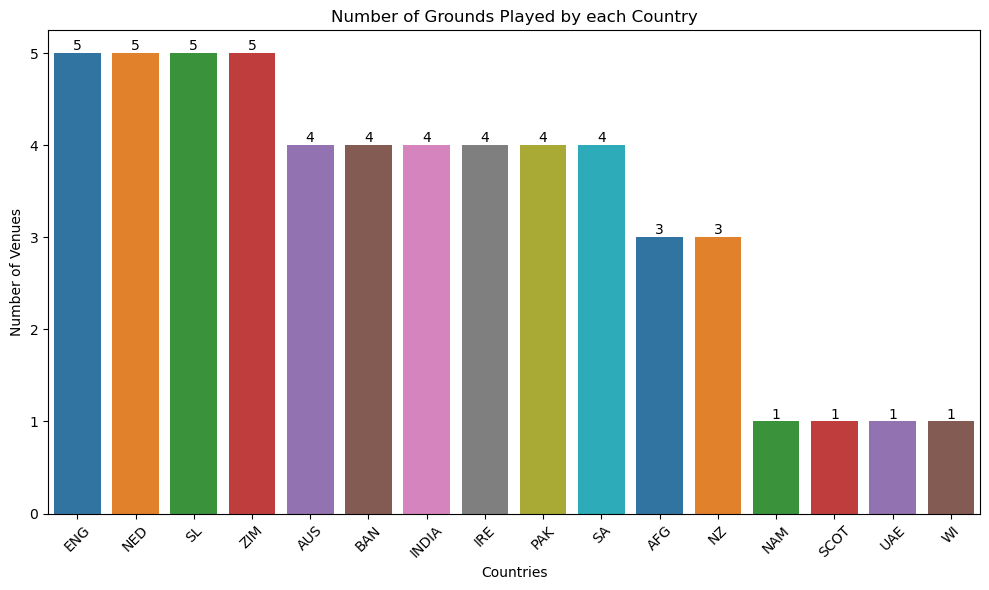

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort df_count1 by 'venue_count' in descending order
df_count1_sorted = df_count1.sort_values(by='venue_count', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='current_innings', y='venue_count', data=df_count1_sorted, palette='tab10')

plt.xlabel('Countries')
plt.ylabel('Number of Venues')
plt.title('Number of Grounds Played by each Country')
plt.xticks(rotation=45)

# Adding y-values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')

plt.tight_layout()
plt.show()


#### Get Every captain Batting details of the tournemet

In [ ]:
df_captain=df[df["captain"]==1]
df_captain.describe()

,match_id,innings_id,runs,ballsFaced,minutes,fours,sixes,strikeRate,captain,isNotOut,log_runs
count,8.300000e+01,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.0,83.000000,83.000000
mean,1.298157e+06,1.493976,18.337349,16.783133,28.530120,1.493976,0.469880,89.504819,1.0,0.084337,2.418498
std,1.356194e+01,0.503003,18.783281,13.311510,21.643642,1.934119,0.860195,46.080327,0.0,0.279582,1.164325
min,1.298135e+06,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,1.298145e+06,1.000000,4.000000,7.000000,11.500000,0.000000,0.000000,60.000000,1.0,0.000000,1.609438
50%,1.298157e+06,1.000000,13.000000,13.000000,22.000000,1.000000,0.000000,88.880000,1.0,0.000000,2.639057
75%,1.298169e+06,2.000000,26.500000,23.000000,37.000000,2.000000,1.000000,118.180000,1.0,0.000000,3.314021
max,1.298179e+06,2.000000,80.000000,54.000000,89.000000,9.000000,3.000000,189.470000,1.0,1.000000,4.394449


In [ ]:
df_captain.describe(include=object)

,match_name,home_team,away_team,venue,city,current_innings,name,fullName
count,83,83,83,83,83,83,83,83
unique,42,16,15,7,7,16,18,18
top,BAN v PAK,INDIA,NED,"Bellerive Oval, Hobart",Hobart,ZIM,SA Edwards,Scott Edwards
freq,2,10,12,17,17,8,8,8


#### Get the Every Team captains Names

In [ ]:

country_captains = df_captain.groupby('current_innings')['fullName'].first().reset_index()

# Rename columns for clarity
country_captains.columns = ['Country', 'Captain']

print(country_captains)


   Country                Captain
0      AFG          Mohammad Nabi
1      AUS           Matthew Wade
2      BAN        Shakib Al Hasan
3      ENG            Jos Buttler
4    INDIA           Rohit Sharma
5      IRE         Andy Balbirnie
6      NAM        Gerhard Erasmus
7      NED          Scott Edwards
8       NZ        Kane Williamson
9      PAK             Babar Azam
10      SA           Temba Bavuma
11    SCOT      Richie Berrington
12      SL          Dasun Shanaka
13     UAE  Chundangapoyil Rizwan
14      WI        Nicholas Pooran
15     ZIM           Craig Ervine


#### Getting Each Team Captains No of Fours and Sixes

In [ ]:
# Group DataFrame by 'fullname' and calculate the sum of fours and sixes for each captain
captain_stats = df_captain.groupby('fullName')[['fours', 'sixes']].sum().reset_index()

print(captain_stats)


                 fullName  fours  sixes
0             Aaron Finch      6      5
1          Andy Balbirnie     10      9
2              Babar Azam     13      0
3   Chundangapoyil Rizwan      3      1
4            Craig Ervine     13      0
5           Dasun Shanaka      6      3
6         Gerhard Erasmus      2      0
7             Jos Buttler     24      7
8         Kane Williamson     11      5
9            Matthew Wade      1      0
10          Mohammad Nabi      1      0
11        Nicholas Pooran      0      1
12         Regis Chakabva      3      0
13      Richie Berrington      3      2
14           Rohit Sharma     11      4
15          Scott Edwards      8      0
16        Shakib Al Hasan      3      0
17           Temba Bavuma      6      2


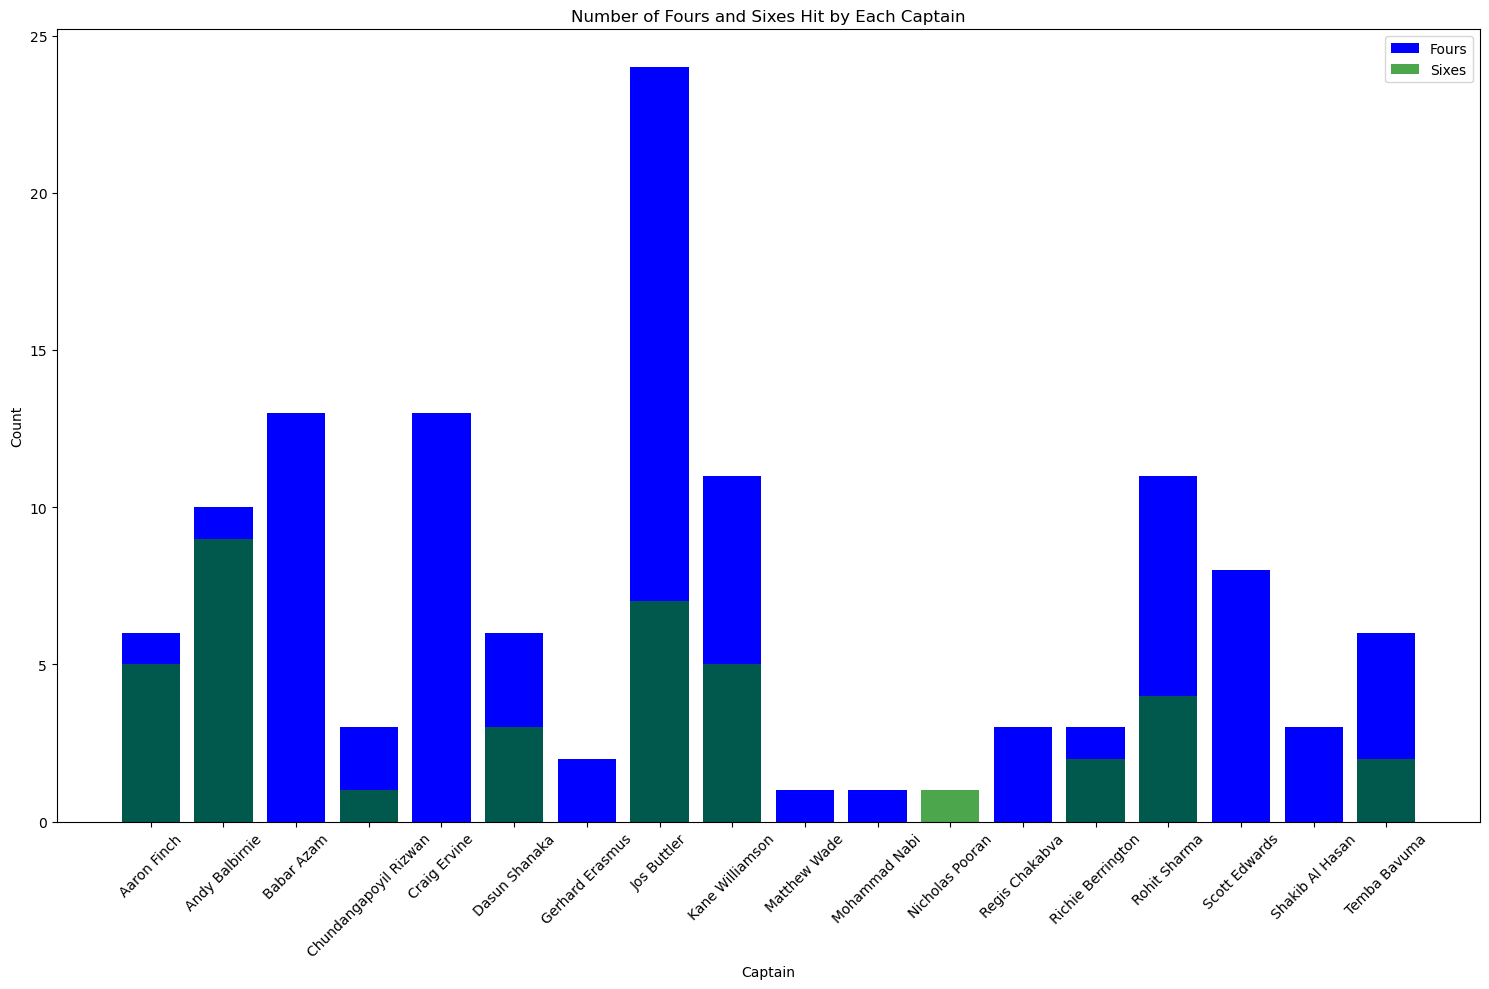

In [ ]:
import matplotlib.pyplot as plt

# Assuming captain_stats DataFrame is already defined as described
plt.figure(figsize=(15, 10))

# Plotting the number of fours
plt.bar(captain_stats['fullName'], captain_stats['fours'], color='blue', label='Fours')

# Plotting the number of sixes
plt.bar(captain_stats['fullName'], captain_stats['sixes'], color='green', label='Sixes', alpha=0.7)

plt.xlabel('Captain')
plt.ylabel('Count')
plt.title('Number of Fours and Sixes Hit by Each Captain')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


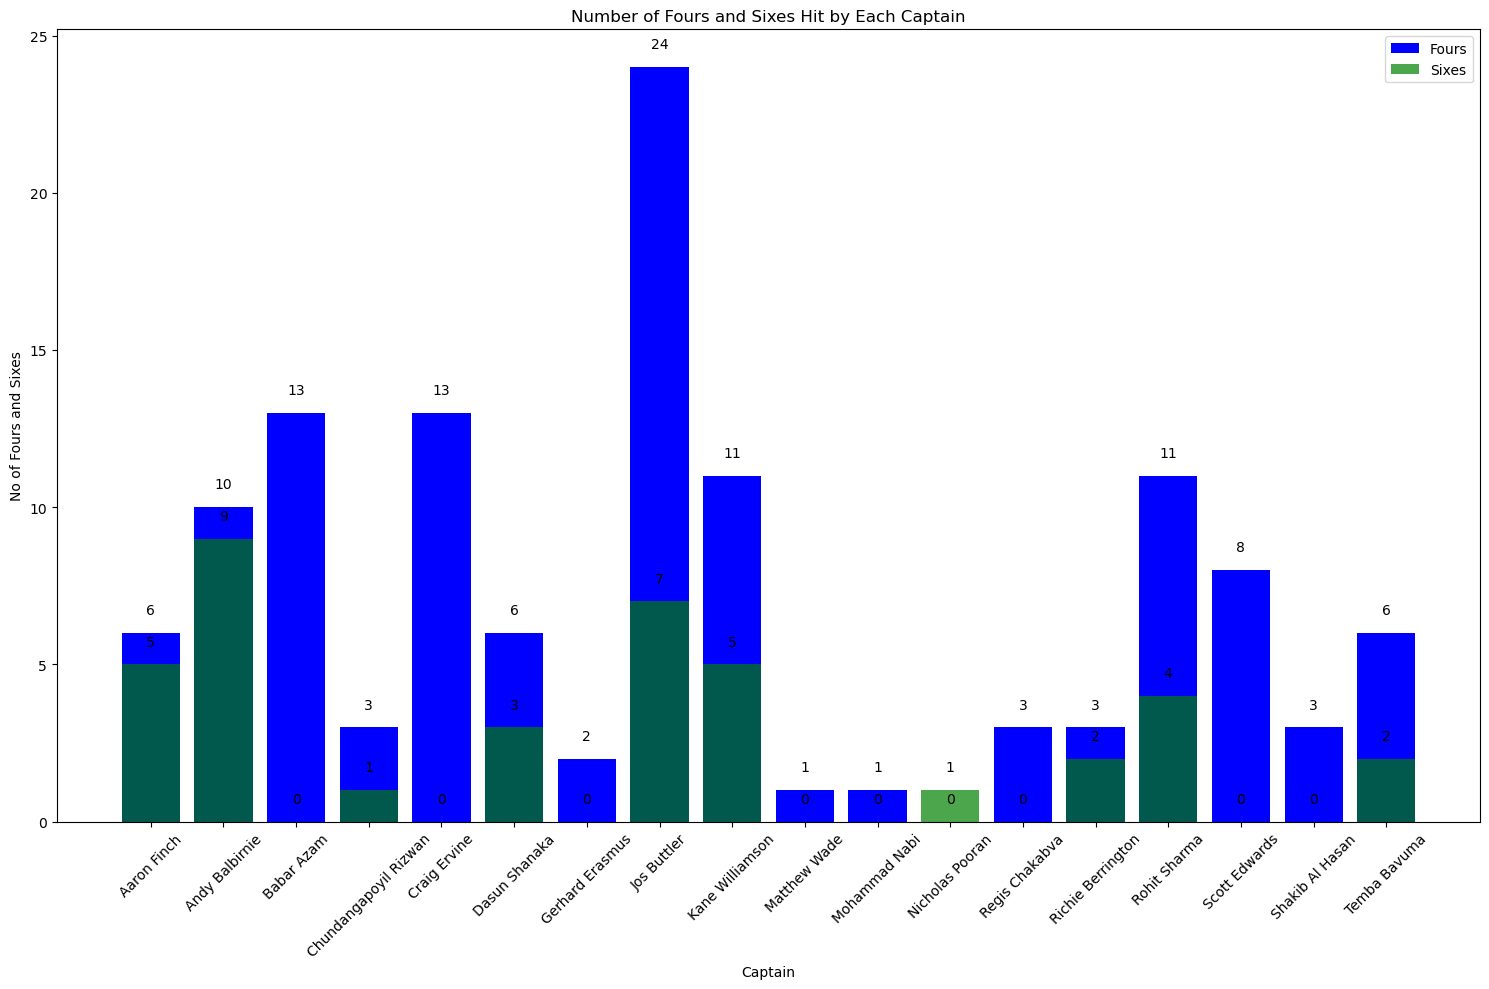

In [ ]:
import matplotlib.pyplot as plt

# Assuming captain_stats DataFrame is already defined as described
plt.figure(figsize=(15, 10))

# Plotting the number of fours
plt.bar(captain_stats['fullName'], captain_stats['fours'], color='blue', label='Fours')

# Plotting the number of sixes
plt.bar(captain_stats['fullName'], captain_stats['sixes'], color='green', label='Sixes', alpha=0.7)

# Add values on top of each bar
for i, (fours, sixes) in enumerate(zip(captain_stats['fours'], captain_stats['sixes'])):
    plt.text(i, fours + 0.5, str(fours), ha='center', va='bottom', color='black')
    plt.text(i, sixes + 0.5, str(sixes), ha='center', va='bottom', color='black')

plt.xlabel('Captain')
plt.ylabel('No of Fours and Sixes')
plt.title('Number of Fours and Sixes Hit by Each Captain')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


#### Get Each Team Captain Total runs and Average Strike Rate of the Tournement

In [ ]:
# Group DataFrame by 'fullname' and 'current_innings' and calculate the sum of runs and mean of strike rate for each captain
captain_stats = df_captain.groupby(['fullName', 'current_innings']).agg({'runs': 'sum', 'strikeRate': 'mean'}).reset_index()

print(captain_stats)



                 fullName current_innings  runs  strikeRate
0             Aaron Finch             AUS   107  111.720000
1          Andy Balbirnie             IRE   153  101.448571
2              Babar Azam             PAK   124   68.665714
3   Chundangapoyil Rizwan             UAE    45   77.200000
4            Craig Ervine             ZIM   112   77.381429
5           Dasun Shanaka              SL    78   70.421429
6         Gerhard Erasmus             NAM    52   87.030000
7             Jos Buttler             ENG   225  115.540000
8         Kane Williamson              NZ   178  109.066000
9            Matthew Wade             AUS     6   75.000000
10          Mohammad Nabi             AFG    17   90.833333
11        Nicholas Pooran              WI    25   83.833333
12         Regis Chakabva             ZIM    13  144.440000
13      Richie Berrington            SCOT    66  112.656667
14           Rohit Sharma           INDIA   116   89.495000
15          Scott Edwards             NE

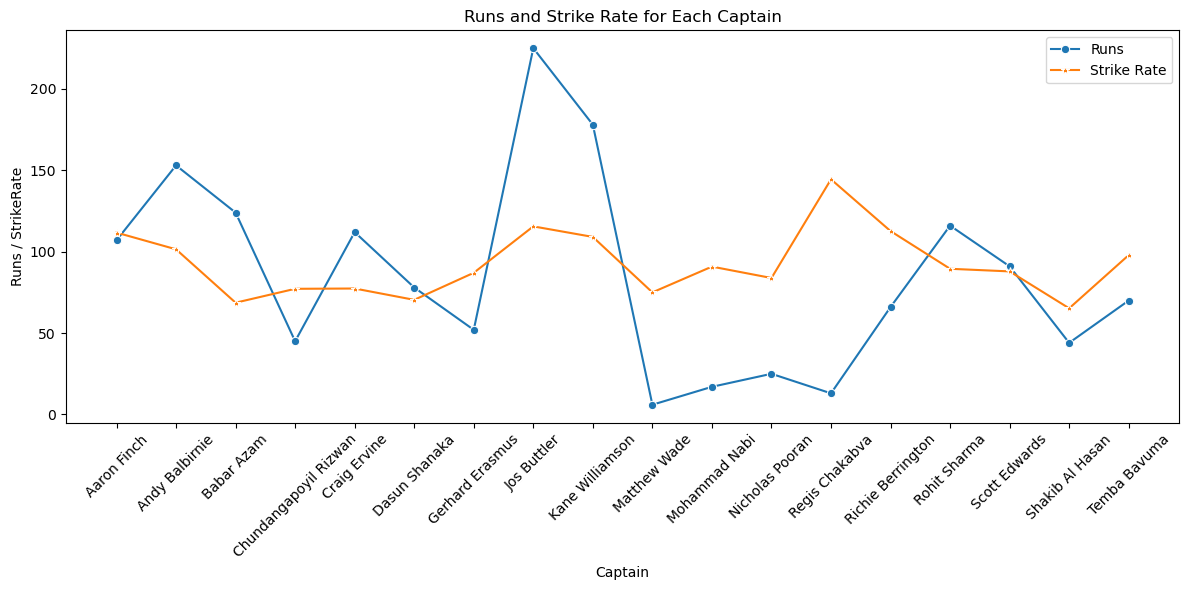

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming captain_stats DataFrame is already defined as described
plt.figure(figsize=(12, 6))

# Create line plot for runs
sns.lineplot(x='fullName', y='runs', data=captain_stats, marker='o', label='Runs')

# Create line plot for strike rate
sns.lineplot(x='fullName', y='strikeRate', data=captain_stats, marker='*', label='Strike Rate')

plt.xlabel('Captain')
plt.ylabel('Runs / StrikeRate')
plt.title('Runs and Strike Rate for Each Captain')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
